In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

import util.functions as funcs

[*********************100%***********************]  1 of 1 completed


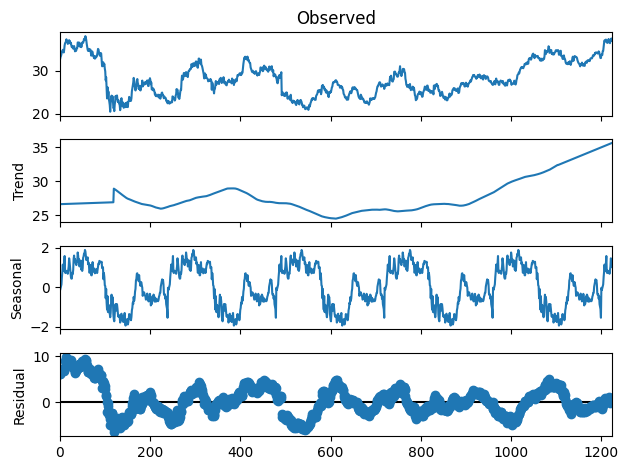

In [8]:
EMPRESA = 'ITUB4.SA'

df_full = funcs.get_data_ticker(EMPRESA, period='5y')
df = df_full.dropna()

dates, X, y = funcs.split_df_X_y(df)

result = seasonal_decompose(y, period=240, extrapolate_trend='freq')

seasonal = result.seasonal

result.plot()
plt.show()

# Obtendo Sazonalidade

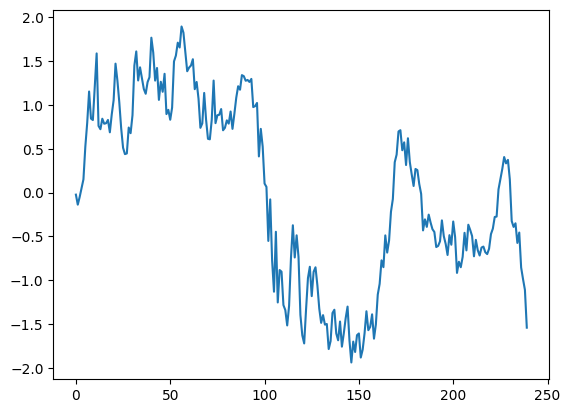

In [10]:
padraoSazonalidade = funcs.find_repetition(seasonal)
plt.plot(padraoSazonalidade)



# Prevendo Sazonalidade

In [11]:
def plotar_resultados():
    def adicionar_grafico(dados, titulo, cor=None):
        plt.plot(dados, label=titulo, color=cor)
        plt.title(titulo)
        plt.xlabel('Dias')
        plt.ylabel('Valor Sazonal')
        plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

    if periodo > len(seasonal):
        # Comparação completa entre sazonalidade prevista e real
        plt.figure(figsize=(12, 5))
        adicionar_grafico(sazonalidadePrevista, 'Sazonalidade Prevista', 'green')
        adicionar_grafico(seasonal, 'Sazonalidade Real')
        
        
        
        # Adicionar título geral
        plt.title('Comparação entre Sazonalidade Prevista, Real e o Padrão Encontrado', fontsize=14)
    else:
        # Dois gráficos em uma figura com comparação limitada ao período
        plt.figure(figsize=(12, 7))
        
        # Primeiro gráfico: Sazonalidade Real
        plt.subplot(2, 1, 1)
        adicionar_grafico(seasonal[:periodo], 'Sazonalidade Real')

        # Segundo gráfico: Sazonalidade Prevista
        plt.subplot(2, 1, 2)
        adicionar_grafico(sazonalidadePrevista[:periodo], 'Sazonalidade Prevista', 'green')

    plt.tight_layout()
    plt.show()

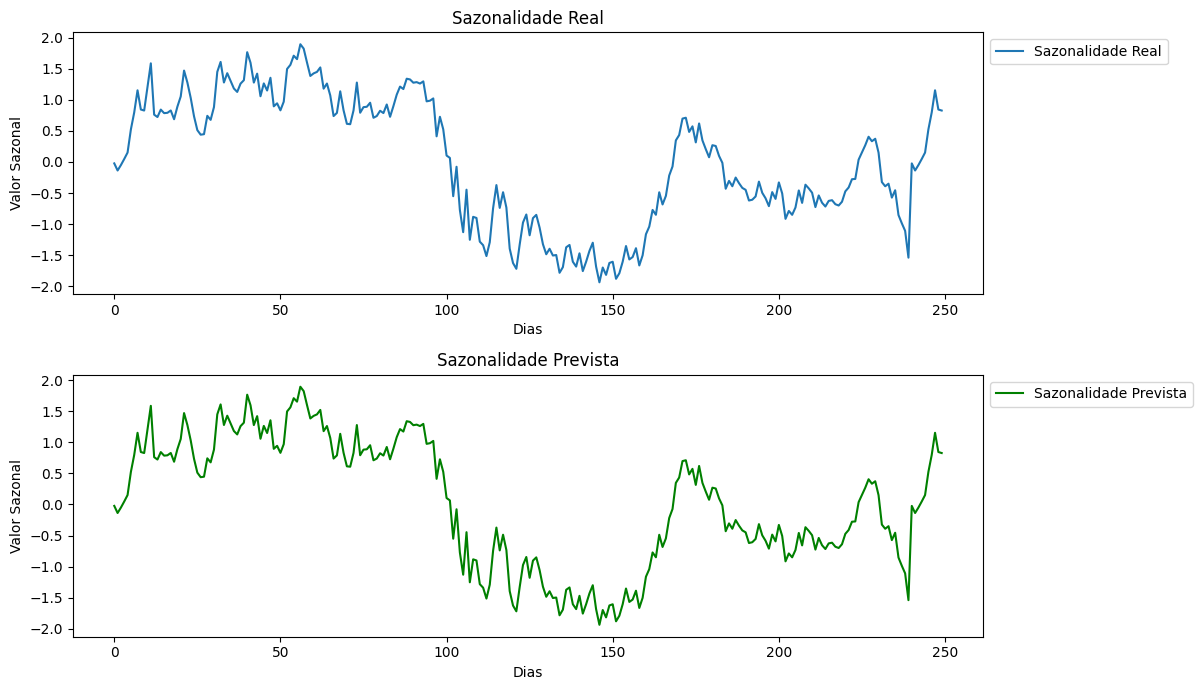

In [13]:
periodo = 250

sazonalidadePrevista = funcs.obter_sazonalidade_periodo(qtdDias=periodo, sazonalidade=seasonal)
plotar_resultados()